In [112]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler 

In [113]:
# 데이터로딩

file_path = "C:/Users/solmi/Downloads/인공지능개론/car_evaluation.csv"  
df = pd.read_csv(file_path)

df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [114]:
# 컬럼 이름부여
df.columns=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
df.columns

Index(['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output'],
      dtype='object')

In [115]:
df

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [116]:
# 결측치 확인
df.isnull().sum()

price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64

In [117]:
columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']

In [118]:
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [119]:
df

,price,maint,doors,persons,lug_capacity,safety,output
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [120]:
df['output'].value_counts()

output
2    1209
0     384
1      69
3      65
Name: count, dtype: int64

In [121]:
#데이터와 타겟분리
X = df.drop('output', axis=1).values
y = df['output'].values

In [122]:
X

array([[3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [123]:
y

array([2, 2, 2, ..., 2, 1, 3])

In [124]:
Y = pd.get_dummies(y).values

In [125]:
y

array([2, 2, 2, ..., 2, 1, 3])

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [127]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((1381, 6), (346, 6), (1381, 4), (346, 4))

In [131]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(6,),activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                70        
                                                                 
 dense_17 (Dense)            (None, 7)                 77        
                                                                 
 dense_18 (Dense)            (None, 6)                 48        
                                                                 
 dense_19 (Dense)            (None, 4)                 28        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


In [132]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
39/39 [==============================] - 1s 13ms/step - loss: 0.8186 - accuracy: 0.6820 - val_loss: 0.7044 - val_accuracy: 0.7122
Epoch 2/30
39/39 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.7013 - val_loss: 0.6317 - val_accuracy: 0.7122
Epoch 3/30
39/39 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.7013 - val_loss: 0.6503 - val_accuracy: 0.6835
Epoch 4/30
39/39 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.6916 - val_loss: 0.6484 - val_accuracy: 0.7050
Epoch 5/30
39/39 [==============================] - 0s 3ms/step - loss: 0.6082 - accuracy: 0.7077 - val_loss: 0.5901 - val_accuracy: 0.7122
Epoch 6/30
39/39 [==============================] - 0s 3ms/step - loss: 0.5862 - accuracy: 0.7118 - val_loss: 0.5446 - val_accuracy: 0.7554
Epoch 7/30
39/39 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.7279 - val_loss: 0.5400 - val_accuracy: 0.7482
Epoch 8/30
39/39 [=

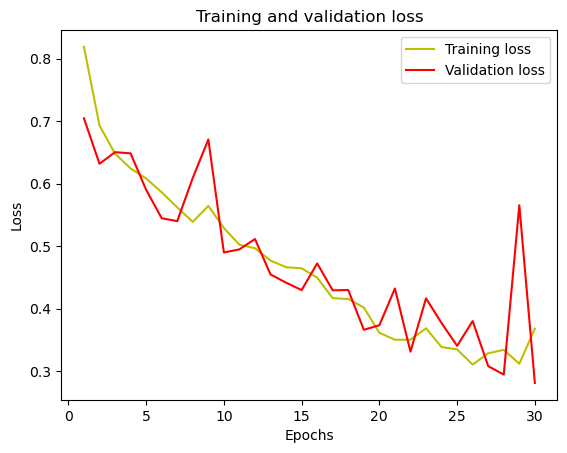

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

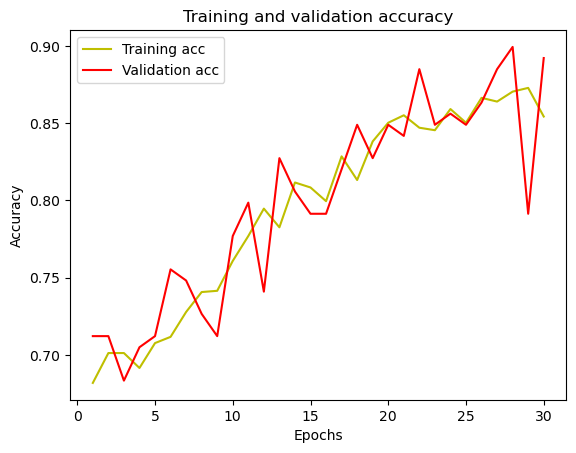

In [134]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [135]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        77
           1       0.00      0.00      0.00        14
           2       0.93      0.97      0.95       239
           3       0.53      0.50      0.52        16

    accuracy                           0.87       346
   macro avg       0.55      0.56      0.56       346
weighted avg       0.83      0.87      0.85       346

[[ 59   1  17   0]
 [  7   0   0   7]
 [  6   0 233   0]
 [  8   0   0   8]]
